In [ ]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.datasets import mnist

In [ ]:
(xtrain , ytrain ) , (xtest , ytest)=mnist.load_data()

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


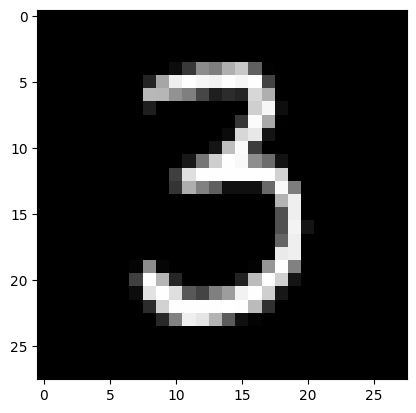

In [ ]:
plt.imshow(xtrain[50,:,:], cmap='gray', vmin=0 , vmax=255)
plt.show()

In [ ]:
# باید ورودی به شکل وکتور باشد نه به شکل ماتریس
# پس باید از حالت ماتریسی خارج شود و به شکل بردار در بیاید
xtrain = xtrain.reshape(60000, 28*28)
xtest = xtest.reshape(10000,28*28)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [ ]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

In [ ]:
xtrain = (xtrain - xtrain.min())/(xtrain.max() - xtrain.min())
xtest = (xtest - xtest.min())/(xtest.max() - xtest.min())

In [ ]:
ytrain = to_categorical(ytrain , num_classes = 10)
ytest = to_categorical(ytest , num_classes=10)
print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(512 , input_dim =28*28 ))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(128))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 472,042 (1.80 MB)

 Trainable params: 472,042 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])
outout_fit = model.fit(xtrain , ytrain , epochs=10 , batch_size=128 )

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - accuracy: 0.7777 - loss: 0.7123
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9525 - loss: 0.1728
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9673 - loss: 0.1164
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9739 - loss: 0.0907
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9797 - loss: 0.0739
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9822 - loss: 0.0585
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 24ms/step - accuracy: 0.9838 - loss: 0.0550
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9856 - loss: 0.0494
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9870 - loss: 0.0428
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9886 - loss: 0.0384


In [ ]:
outout_fit.history.keys()

dict_keys(['accuracy', 'loss'])

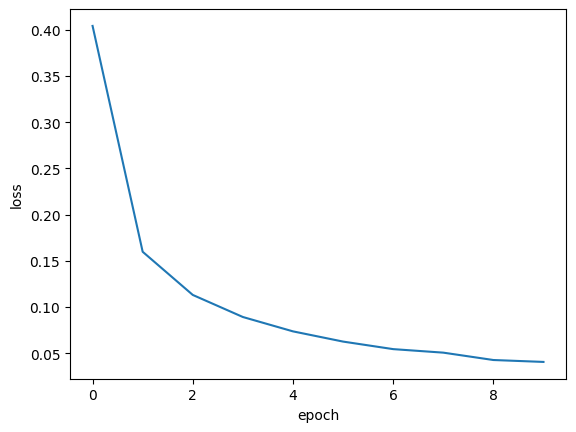

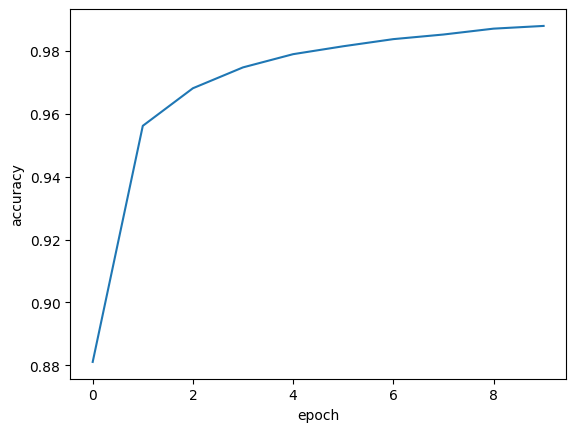

In [ ]:
plt.plot(outout_fit.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
plt.plot(outout_fit.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
output_predict = model.predict(xtest, batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
predicted_classes = np.argmax(model.predict(xtest, batch_size=64), axis=-1)
print(ytrain[0:20])
print(predicted_classes[0:20])

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
output_evaluate = model.evaluate(xtest , ytest , batch_size=128)
print(output_evaluate)

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9763 - loss: 0.1007
[0.07895760238170624, 0.9803000092506409]
